In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Uniform Distribution

The **Uniform Distribution** is used when all events in a given sample space are equally likely to occur. We see this distribution in tossing a fair coin, rolling a die, or using a random number generator. Notice these examples include both discrete and continuous random variables. *The Uniform Distribution has both discrete and continuous versions!* 

First we will discuss the discrete version.

## Discrete Uniform Empirical Distribution

As a simple example, we'll build an empirical distribution of rolls of a six-sided die.

So far we have randomly sampled from a list or array. We can also randomly sample from DataFrames! This is advantageous in the situation where we want to select a random subset of data to build predictive models or to analyze.

First, we create a DataFrame representing a six-sided die.

In [4]:
die = pd.DataFrame(
   {
       'Face': np.arange(1, 7),
   }
)
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


We see that this DataFrame has six rows and one column (Face).
Similar to randomly selecting an option from a list, we can randomly sample from a DataFrame, using the DataFrame's `sample()` method.

This method randomly selects an entire row or rows from the DataFrame. Below, the input argument `n = 1` denotes that we want to select exactly one row. We can choose to sample more than one row by changing `n`.

In [6]:
die.sample(n = 1)

,Face
3,4


Some additional arguments to this function include:
- `replace`: whether to "replace" rows for re-sampling (note: `np.random.choice()` also has this argument!)
- `random_state`: the initial state of the pseudo-random generator

Setting the `replace` option to `True` allows us to sample the same row more than once. With this option, we are choosing a row, replacing it in the "pool" of options to sample, and choosing our next row from the original DataFrame. Setting this option to `False` allows us to choose a row only once. The default in pandas is `replace=False`.

Setting the `random_state` equal to some integer allows for reproducibility of results. With this option, `sample` still gives us a "random" result, but it will be the same "random" result each time we run our experiment. ("True" randomness is, after all, the domain of quantum mechanics!) Note that for now this is not extremely important, but it will be useful for predictive modeling in the future.

In [8]:
die.sample(10, replace=True, random_state=1)

,Face
5,6
3,4
4,5
0,1
1,2
3,4
5,6
0,1
0,1
1,2


Above, we randomly sampled ten numbers between one and six (inclusive) with replacement corresponding to our rolling a die ten times. This is an example of a probabilistic sample as the chance of each face landing upright is 1/6, and we know this before rolling the die.

We can now visualize the results of these random samples with a barchart. This will give us an idea of how often each number is rolled.

If we only roll the die 12 times, some numbers appear with much greater frequency than others. (Notice that 3 doesn't appear at all in the graph below since it appeared 0 times in the sample)

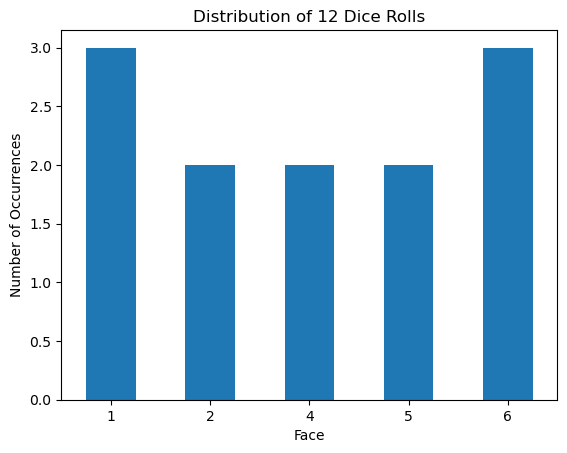

In [10]:
# This code takes a sample of 12 die, looks at the faces column of the dataframe,
# counts the number of times each value occurs, sorts them from 1 to 6, then plots a bar chart
#
# Note we use a barchart to depict a discrete distribution

die.sample(12, replace=True, random_state=1).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of 12 Dice Rolls");
plt.xticks(rotation=0);
plt.show()

Randomly sampling 100 rolls of the die we start to see a more evenly distributed graph.

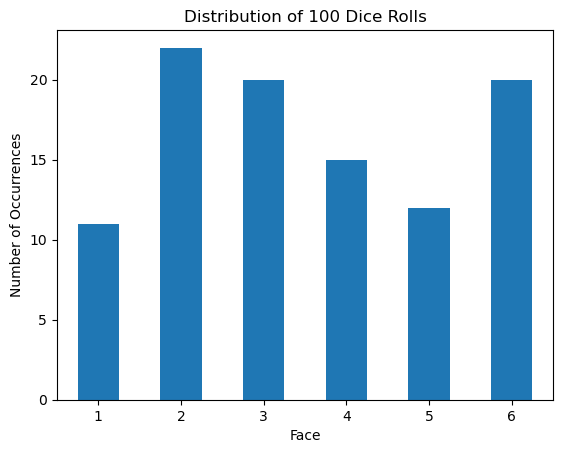

In [12]:
die.sample(100, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of 100 Dice Rolls");
plt.xticks(rotation=0);
plt.show()

Let's see how the distribution changes as we increase the number of randomly sampled rolls of a six-sided die from 1,000 to 100,000



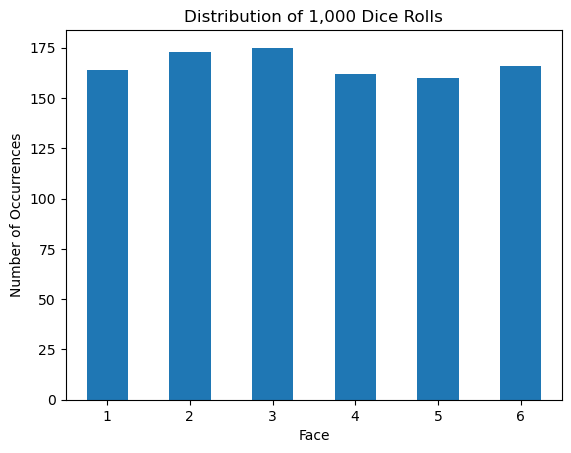

In [14]:
die.sample(1_000, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of 1,000 Dice Rolls");
plt.xticks(rotation=0);
plt.show()

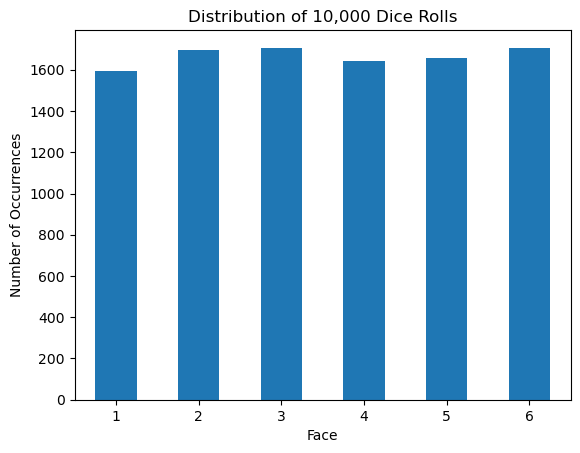

In [15]:
die.sample(10_000, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of 10,000 Dice Rolls");
plt.xticks(rotation=0);
plt.show()

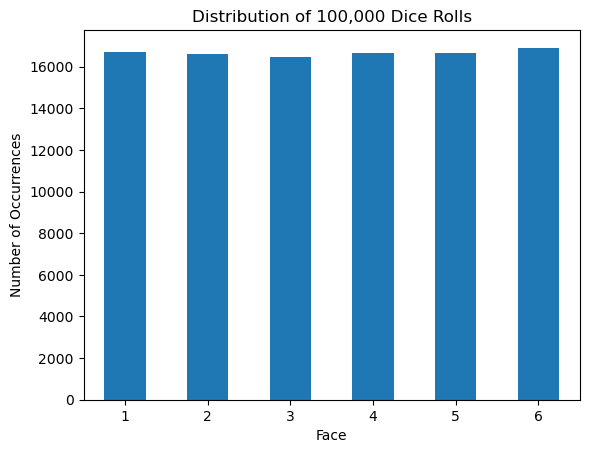

In [16]:
die.sample(100_000, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of 100,000 Dice Rolls");
plt.xticks(rotation=0);
plt.show()

As the number of samples increases – that is, as we roll the die many many many times – we find that the empirical distribution (our observed distribution of dice rolls) shows each face of the die appears roughly the same number of times. As we know the probability of sampling each face of the die is the same (1/6), we are seeing our empirical distribution get closer to the true probability distribution of the die, looking more *uniform*.

This phenomenon is related to a mathematical theorem known as the **Law of Large Numbers**. The Law of Large Numbers states that, as the number of experiments increases, the mean of the empirical distribution gets closer to the mean of the probability distribution (also known as the expected value).

Let's look at the mean of the empirical distribution for different numbers of experiments.

In [18]:
np.mean(die.sample(100, replace=True, random_state = 118))

3.18

In [19]:
np.mean(die.sample(1_000, replace=True, random_state = 118))

3.469

In [20]:
np.mean(die.sample(1_000_000, replace=True, random_state = 118))

3.498847

<font color="purple">





</font>

These seem to be approaching 3.5, but in order to know for sure, we need to know more about the probability distribution for our dice rolling example: the **Discrete Uniform Distribution**.

## Discrete Uniform Probability Distribution

How do we define this rolling of a six-sided die mathematically? We saw above that repeating this experiment yielded a collection of samples from the population for samples of sizes 100, 1,000, 10,000 and larger.

In the case where each outcome is equally likely to occur, the function that assigns probabilities is the **uniform distribution**. For a sample space containing $n$ elements, the PMF is defined by:

> $P(X=x)=\frac{1}{n}$ for all x in the sample space S (0 otherwise).

Further, if $E$ is an event containing multiple elements from the sample space, then:

> $P(E)=\frac{\text{Number of elements in E}}{n}$

For our example of rolling a six-sided die, each roll has a probability of exactly $\frac{1}{6} \approx 0.1666$ of occurring. If we take the example of rolling a six-sided die 1,000 times and computing the probabilities of each result, we find that, in practice, the empirical probability we rolled a 1 was $0.171$, not the $0.1666$ given by the theoretical probability.

In [24]:
#both the np.random.choice and DataFrame.sample functions sample from a uniform distribution by default
empirical_probabilities = (die.sample(1_000, replace=True,random_state=1).value_counts())/1_000
empirical_probabilities

Face
1       0.171
6       0.170
3       0.169
2       0.166
5       0.164
4       0.160
Name: count, dtype: float64

Returning to our discussion of the Law of Large Numbers, what is the expected value (mean) of the Uniform Probability Distribution? 

The mean of a uniform distribution with PMF $P(X=x)=\frac{1}{n}$ and sample space S = {1, 2, ..., n} is:

> $\mu(X)=\frac{n+1}{2}$

This corresponds to the average of the elements in our sample space: 
> $\frac{1+2+...+n}{n}= \frac{\frac{n(n+1)}{2}}{n}= \frac{n+1}{2}$

In our dice rolling example, n is 6 so the expected (theoretical) mean of our probability distribution is $\frac{6+1}{2} = 3.5$. So the means of our empirical distributions are indeed approaching 3.5 as the samples get larger. 

We can also calculate the variance and standard deviation for the probability distribution of dice rolling. The variance of a uniform probability distribution with sample space S = {1, 2, ..., n} is:

 > $\sigma^2(X)=\frac{n^2 - 1}{12}$

 which for our example is:
 
 > $\frac{6^2 - 1}{12} = 2.92$
 
As the standard deviation is the square root of the variance, the standard deviation of our dice rolling example is 1.71. 
 
Let's check whether an empirical distribution of rolling 1,000,000 die will match the expected standard deviation:

In [26]:
np.std(die.sample(1_000_000, replace=True))

Face    1.707461
dtype: float64

What we see in our empirical distribution matches what we would expect mathematically knowing the probability distribution it is approximating. In fact, the Law of Large Numbers says that when $n$, or the number of samples, is large, the mean and standard deviation from our empirical distribution serves as a good estimate for the mean and standard deviation of the probability distribution.

## Continuous Uniform Probability Distribution

Imagine that instead of sampling from a discrete sample space, as in our dice rolling example, we sample with replacement from a continuous sample space also between 1 and 6. Now, our random variable can take on any real number in this interval. When no outcome has a higher chance than another of being selected (imagine throwing a dart at a number line), this random variable is continuously uniform. 

We denote a continuous uniform random variable, $X$, on the interval $[a, b]$ with $X \sim U(a,b)$. Therefore, a random variable that takes values between 1 and 6 would be denoted by $X \sim U(1,6)$. 

The PDF for a continuous uniform random variable is:

> $f(x) = \frac{1}{b-a}$ when $x$ is between $a$ and $b$ and 0 otherwise.

From this distribution, we calculate the middle of the interval:

> $\mu = \frac{b+a}{2}$

and the variance:

> $\sigma^2 = \frac{(b-a)^2}{12}$ 

Our continuous random variable $X \sim U(1,6)$ would have PDF $P(X=x) = \frac{1}{6-1} = \frac{1}{5}$ when $x$ is between $1$ and $6$ and 0 otherwise. It also has $\mu = \frac{6+1}{2} = \frac{7}{2}$ and $\sigma = \sqrt{\sigma^2} = \sqrt{\frac{(6-1)^2}{12}}= \sqrt{\frac{25}{12}} \approx 1.44$

The graph of this distribution is shown below along with the mean as a red dot and one standard deviation plotted with dashes on either side of the mean.

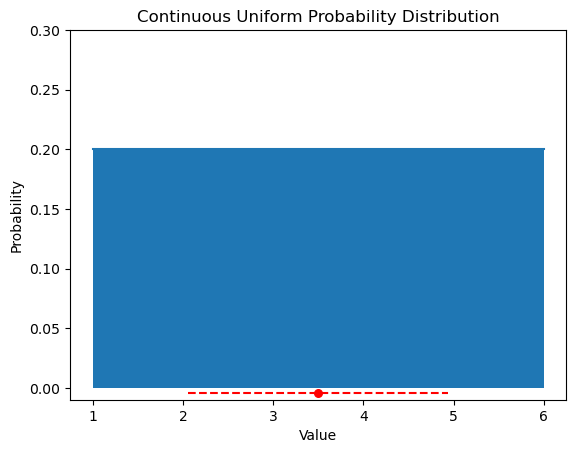

In [30]:
plt.plot([1,2,3,4,5,6], [0.2]*6)
plt.fill_between([1,2,3,4,5,6], [0.2]*6, 0)
plt.scatter(7/2, -0.004, color='red', s=30)
plt.hlines(y=-0.004, xmin=7/2 - 1.44, xmax=7/2 + 1.44, color = 'red', linestyles = 'dashed')
plt.ylim([-0.01,0.3]);
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Continuous Uniform Probability Distribution");

Often, it is useful to be able to draw samples from a known distribution like the uniform. Previously, we have used `np.random.choice()` to draw samples from a given list. The `np.random()` module has other useful functions for drawing random samples, including `np.random.uniform()`. This function takes in a value for `low` and `high` as well as a `size` (the number of samples to draw) and draws from the continuous uniform probability distribution on the interval [`low` to `high`). 

Below, we draw 10 random samples from the uniform distribution depicted above.

In [32]:
np.random.uniform(low = 1, high = 6, size = 10)

array([2.25018693, 4.36903146, 4.95165919, 5.75589551, 2.75974403,
       5.45263826, 5.49055352, 1.64506181, 5.5491819 , 1.70505461])

We can use this random number generator to create an empirical distribution for the continuous uniform.

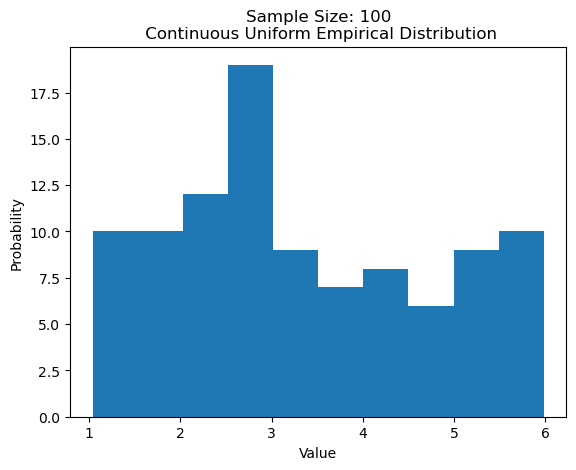

In [34]:
# Note we use a histogram to depict a continuous distribution
plt.hist(np.random.uniform(1,6,100));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Sample Size: 100\n Continuous Uniform Empirical Distribution");

Again, due to the Law of Large Numbers, as the size of the sample increases, we see the histograms look more like the graph of the uniform probability distribution.

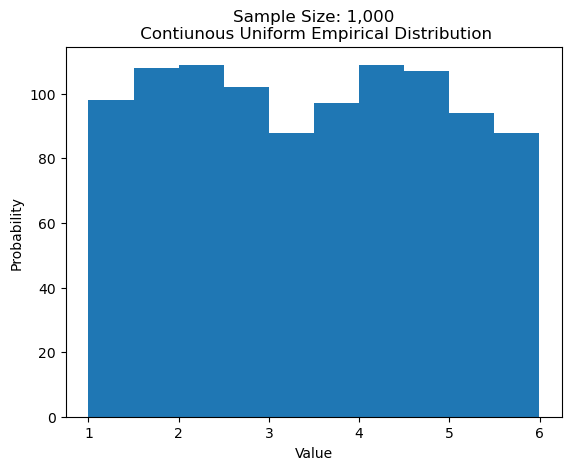

In [36]:
plt.hist(np.random.uniform(1,6,1_000));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Sample Size: 1,000\n Contiunous Uniform Empirical Distribution");

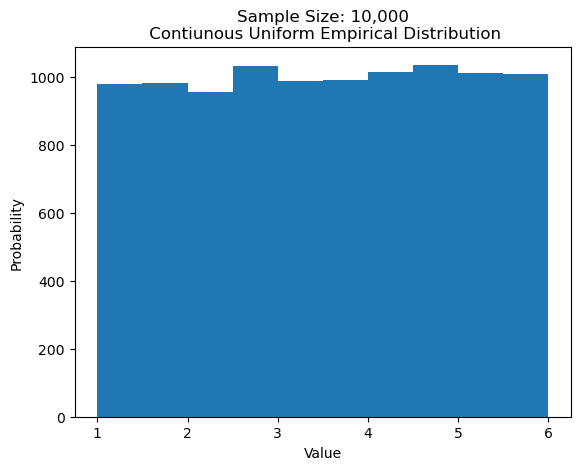

In [37]:
plt.hist(np.random.uniform(1,6,10_000));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Sample Size: 10,000\n Contiunous Uniform Empirical Distribution");

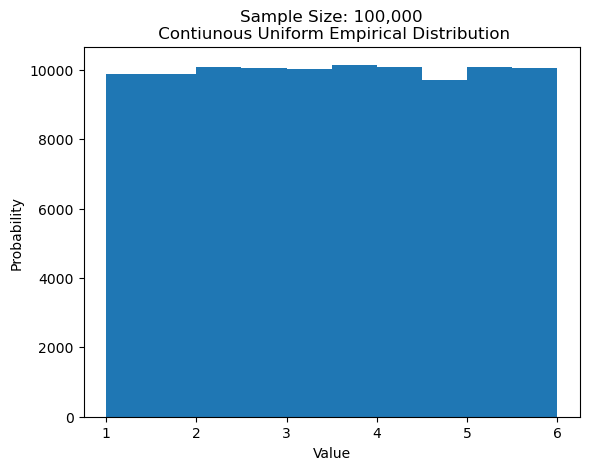

In [38]:
plt.hist(np.random.uniform(1,6,100_000));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Sample Size: 100,000\n Contiunous Uniform Empirical Distribution");

The mean and standard deviation approach the theoretical values we calculated as well.

In [40]:
np.random.uniform(1,6,100_000).mean()

3.4925826450035466

In [41]:
np.random.uniform(1,6,100_000).std()

1.4504914873087573

Next we will discuss one of the most commonly used probability distributions of all: the **Normal Distribution**.